# Pymaceuticals Inc.
---

### Analysis
The study seems fairly distributed amongst the drug adn gender of the mice, with an almost even 50/50 split between genders. Based on the analysis of the data provided by the study, it is clear that "Capomulin" and "Ramicane" are the two most effective drugs at reducing tumor volume in mice. Ramicane takes the edge here with an average tumor volume slightly lower than that of Capomulin. The least effective drug in terms of reducing tumor size is Ketapril, with an average tumor volume of 55.23mm3, which is higher than the average tumor volume of mice that only recieved a placebo. Naftisol and Stelasyn also have a higher average tumor volume than mice that only recieved a placebo. Capomulin and Ramicane are also the most consistent forms of treatment, with a standard error value around 0.32, while all other drugs are above a 0.45 value. 
 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [15]:
# Checking the number of mice.
mouse_study['Mouse ID'].nunique()


249

In [16]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study[mouse_study.duplicated(subset = ['Mouse ID','Timepoint'], keep=False)]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_study[mouse_study.duplicated(subset = ['Mouse ID','Timepoint'], keep=False)]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
id_drop = 'g989'

mouse_study = mouse_study[mouse_study['Mouse ID'] != id_drop]
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
# Checking the number of mice in the clean DataFrame.
mouse_study['Mouse ID'].nunique()

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_median = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_var = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_stdev = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_sem = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
regimen_summary = pd.DataFrame({"Mean Tumor Volume" : tumor_mean, "Median Tumor Volume" : tumor_median, "Tumor Volume Variance" : tumor_var, "Tumor Volume Std. Dev." : tumor_stdev, "Tumor Volume Std. Err." : tumor_sem})
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
tumor_data = mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(["mean","median","var","std","sem"])
# Using the aggregation method, produce the same summary statistics in a single line
tumor_data.rename(columns={"mean" : "Mean Tumor Volume", "median" : "Median Tumor Volume", "var" : "Tumor Volume Variance", "std" : "Tumor Volume Std. Dev.", "sem" : "Tumor Volume Std. Err."}, inplace=True)
tumor_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

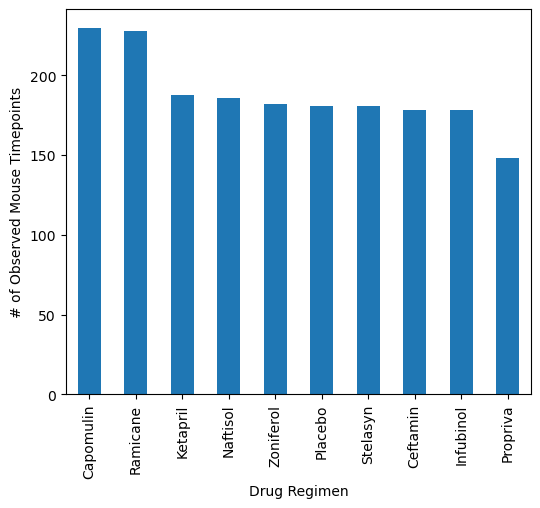

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_per_drug = mouse_study.groupby('Drug Regimen')

mouse_count = mouse_per_drug['Drug Regimen'].count()

sorted_count = mouse_count.sort_values(ascending=False)

drug_use_count = sorted_count.plot(kind = 'bar', figsize=(6,5))
drug_use_count.set_xlabel("Drug Regimen")
drug_use_count.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

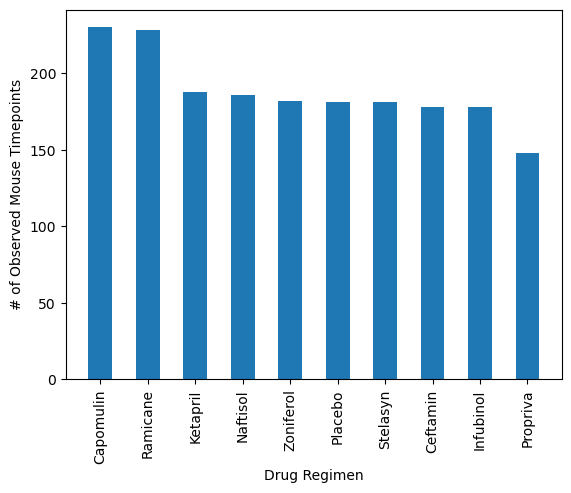

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(sorted_count))
y_axis = sorted_count
tick_loc = [value for value in x_axis]
tick_names = [name for name in sorted_count.keys()]



plt.bar(x_axis, y_axis, width=.5, color='tab:blue', align='center')
plt.xticks(tick_loc, tick_names, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

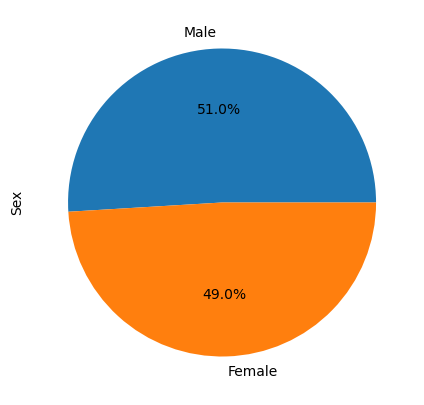

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_per_sex = mouse_study.groupby('Sex')

mouse_sex_count = mouse_per_sex['Sex'].count().sort_values(ascending=False)

mouse_sex_chart = mouse_sex_count.plot(kind = 'pie', subplots=True, autopct='%1.1f%%', figsize=(6,5))

plt.show()

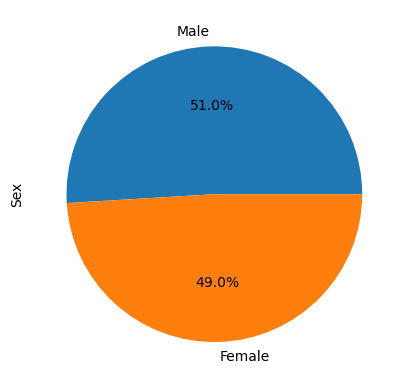

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_sex_count.keys()
colors = ["tab:blue", "tab:orange"]
plt.pie(mouse_sex_count, labels=labels, colors=colors, autopct="%1.1f%%", startangle=0)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_drug_reg = mouse_study.loc[mouse_study["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
mouse_cap_max = mouse_drug_reg.groupby('Mouse ID').max()['Timepoint']
mouse_max = pd.DataFrame(mouse_cap_max)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_max_merge = pd.merge(mouse_max, mouse_study, on=("Mouse ID","Timepoint"), how="left")
mouse_max_merge.reset_index(drop=True)
mouse_max_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumors = mouse_max_merge.loc[mouse_max_merge['Drug Regimen']== treatment]
    tumor_vol = tumors["Tumor Volume (mm3)"]
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    
    tumor_vol = []
    # add subset 
    # Determine outliers using upper and lower bounds
    print(f"{treatment}'s potential outliers are values below {lower_bound} and values above {upper_bound}.")

Capomulin's potential outliers are values below 20.70456164999999 and values above 51.83201549.
Ramicane's potential outliers are values below 17.912664470000003 and values above 54.30681135.
Infubinol's potential outliers are values below 36.83290494999999 and values above 82.74144559000001.
Ceftamin's potential outliers are values below 25.355449580000002 and values above 87.66645829999999.


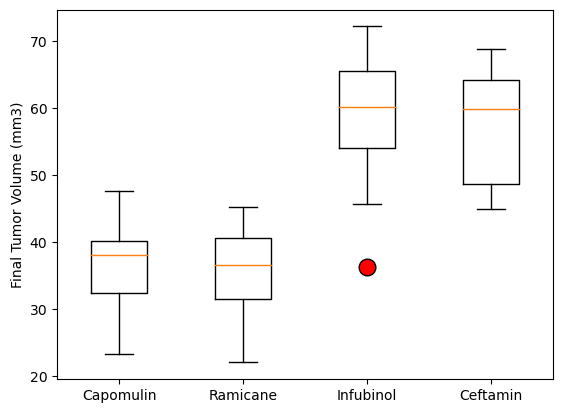

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol2=[]
for treatment in treatments:
    tumors = mouse_max_merge.loc[mouse_max_merge['Drug Regimen']== treatment]
    tumor_volume = tumors["Tumor Volume (mm3)"]
    tumor_vol2.append(tumor_volume)
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')
fig, ax = plt.subplots()
ax.boxplot(tumor_vol2, labels=treatments, flierprops=flierprops)
ax.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

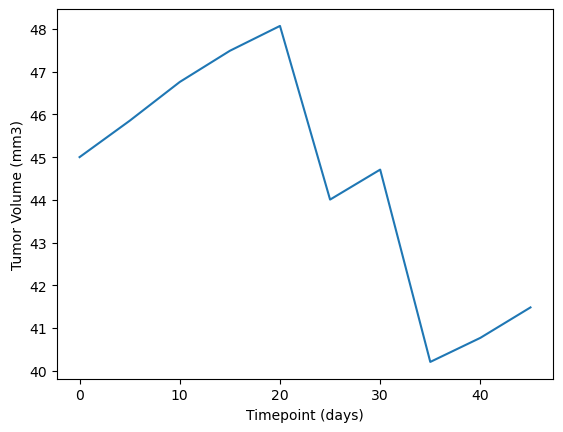

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_cap = mouse_study.loc[mouse_study['Drug Regimen']== "Capomulin"]

single_mouse = mouse_cap.loc[mouse_cap['Mouse ID'] == "l509"]
x_axis = single_mouse["Timepoint"]
y_axis = single_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

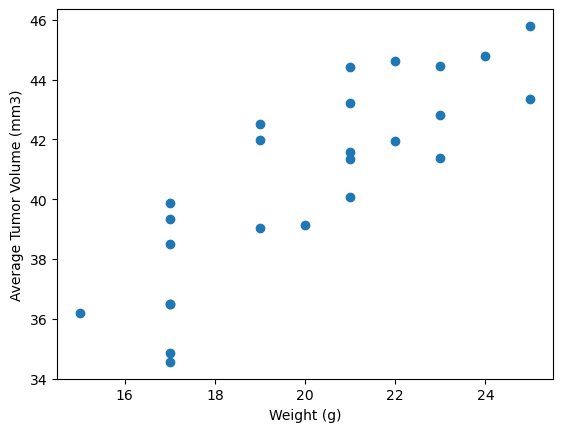

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

x_axis = mouse_cap.groupby("Mouse ID")["Weight (g)"].mean()
y_axis = mouse_cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(x_axis, y_axis, marker="o", facecolors="tab:blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


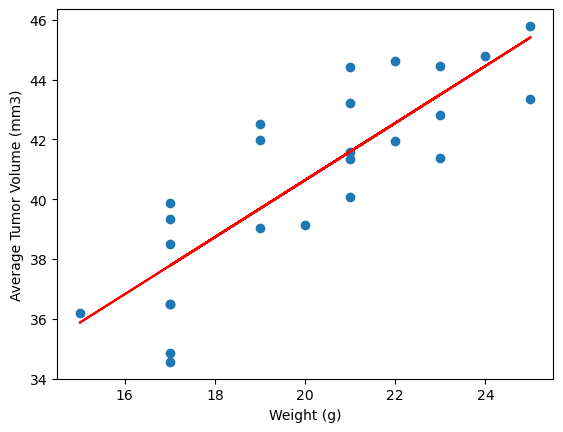

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
x_axis = mouse_cap.groupby("Mouse ID")["Weight (g)"].mean()
y_axis = mouse_cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(x_axis, y_axis, marker="o", facecolors="tab:blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
reg_val = x_axis * slope + intercept
plt.plot(x_axis,reg_val,"r-")
plt.show()